In [1]:
import pandas as pd
data = pd.read_csv('dataset_SCL.csv')
data.head()

/home/lorena/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


#  1) ¿Cómo se distribuyen los datos?

## Reconocimiento y limpieza de datos 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


### Separación de fecha y hora

In [3]:
data['Fecha-I'].unique()
split_data = data['Fecha-I'].str.split(' ')
lista = split_data.to_list()
names = ["Fecha-I-split", "Hora-I-split"]
new_df = pd.DataFrame(lista, columns=names)
new_df

data.insert(18,'Fecha-I-split',new_df['Fecha-I-split'])
data.insert(19,'Hora-I-split',new_df['Hora-I-split'])

In [4]:
data['Fecha-I-split'].unique()

array(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
       '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
       '2017-01-09', '2017-01-11', '2017-01-14', '2017-01-16',
       '2017-01-18', '2017-01-21', '2017-01-23', '2017-01-25',
       '2017-01-28', '2017-01-30', '2017-01-10', '2017-01-12',
       '2017-01-13', '2017-01-15', '2017-01-17', '2017-01-19',
       '2017-01-22', '2017-01-24', '2017-01-26', '2017-01-27',
       '2017-01-29', '2017-01-31', '2017-01-20', '2017-02-04',
       '2017-02-06', '2017-02-08', '2017-02-11', '2017-02-13',
       '2017-02-15', '2017-02-20', '2017-02-22', '2017-02-25',
       '2017-02-27', '2017-02-01', '2017-02-02', '2017-02-03',
       '2017-02-07', '2017-02-09', '2017-02-10', '2017-02-12',
       '2017-02-14', '2017-02-16', '2017-02-17', '2017-02-18',
       '2017-02-19', '2017-02-21', '2017-02-23', '2017-02-24',
       '2017-02-26', '2017-02-28', '2017-02-05', '2017-03-01',
       '2017-03-04', '2017-03-06', '2017-03-08', '2017-

In [5]:
data['Hora-I-split'].unique()

array(['23:30:00', '22:00:00', '22:30:00', ..., '21:18:00', '22:36:00',
       '18:54:00'], dtype=object)

In [6]:
data['Fecha-I-split'].unique()

array(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
       '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
       '2017-01-09', '2017-01-11', '2017-01-14', '2017-01-16',
       '2017-01-18', '2017-01-21', '2017-01-23', '2017-01-25',
       '2017-01-28', '2017-01-30', '2017-01-10', '2017-01-12',
       '2017-01-13', '2017-01-15', '2017-01-17', '2017-01-19',
       '2017-01-22', '2017-01-24', '2017-01-26', '2017-01-27',
       '2017-01-29', '2017-01-31', '2017-01-20', '2017-02-04',
       '2017-02-06', '2017-02-08', '2017-02-11', '2017-02-13',
       '2017-02-15', '2017-02-20', '2017-02-22', '2017-02-25',
       '2017-02-27', '2017-02-01', '2017-02-02', '2017-02-03',
       '2017-02-07', '2017-02-09', '2017-02-10', '2017-02-12',
       '2017-02-14', '2017-02-16', '2017-02-17', '2017-02-18',
       '2017-02-19', '2017-02-21', '2017-02-23', '2017-02-24',
       '2017-02-26', '2017-02-28', '2017-02-05', '2017-03-01',
       '2017-03-04', '2017-03-06', '2017-03-08', '2017-

In [7]:
data['Hora-I-split'].unique()

array(['23:30:00', '22:00:00', '22:30:00', ..., '21:18:00', '22:36:00',
       '18:54:00'], dtype=object)

In [8]:
data['Vlo-I'].unique()
data['Vlo-I'] = data['Vlo-I'].astype(str)
data['Vlo-I'].unique()

array(['226', '912', '940', '92', '93', '401', '11', '1011', '1281',
       '1283', '1285', '1287', '1289', '1291', '2291', '98', '116', '176',
       '240', '295', '689', '250', '112', '118', '174', '249', '276',
       '495', '4495', '146', '7661', '7663', '9245', '9268', '9362',
       '6830', '702', '624', '28', '846', '709', '741', '8021', '8023',
       '8027', '8029', '8069', '8073', '8075', '8099', '8125', '8137',
       '8160', '8161', '9601', '9615', '9651', '9653', '9661', '9689',
       '9782', '9623', '1', '3', '7', '9', '13', '15', '17', '21', '23',
       '25', '41', '43', '51', '53', '55', '61', '71', '73', '75', '81',
       '83', '102', '104', '106', '108', '110', '120', '122', '128',
       '130', '132', '134', '140', '142', '150', '156', '160', '162',
       '164', '166', '170', '172', '180', '182', '184', '186', '188',
       '190', '192', '194', '196', '501', '503', '507', '521', '531',
       '551', '800', '802', '804', '1083', '14', '31', '35', '37', '57',
     

In [9]:
data['Ori-I'].unique()

array(['SCEL'], dtype=object)

In [10]:
data['Des-I'].unique()

array(['KMIA', 'KDFW', 'SAEZ', 'CYYZ', 'LFPG', 'MMMX', 'SABE', 'SKBO',
       'LIRF', 'EGLL', 'MPTO', 'KATL', 'SBGR', 'SBGL', 'SBFL', 'LEMD',
       'SPJC', 'YSSY', 'KIAH', 'SGAS', 'SBFI', 'SCTE', 'SCCI', 'SCNT',
       'SCBA', 'SCVD', 'SCQP', 'SCIE', 'SCSE', 'SCAT', 'SCCF', 'SCFA',
       'SCDA', 'SCAR', 'SAME', 'SACO', 'SUMU', 'SCPQ', 'SCJO', 'KMCO',
       'KJFK', 'SEGU', 'MMUN', 'MDPC', 'KLAX', 'NZAA', 'SCIP', 'SLLP',
       'SLVR', 'SBCT', 'SEQM', 'SAZS', 'SAAR', 'SANT', 'YMML', 'SEQU',
       'SANU', 'SAZN', 'SPSO', 'SAWH', 'EGYP', 'SULS', 'SLCB', 'SARI'],
      dtype=object)

In [11]:
data['Emp-I'].unique()

array(['AAL', 'ACA', 'AFR', 'AMX', 'ARG', 'AUT', 'AVA', 'AZA', 'BAW',
       'CMP', 'DAL', 'GLO', 'IBE', 'KLM', 'QFU', 'UAL', 'LAP', 'TAM',
       'SKU', 'LAN', 'LAW', 'JMR', 'LXP', 'LNE', 'LPE', 'DSM', 'PUE',
       'JAT', 'ONE', 'LRC'], dtype=object)

In [12]:
data['Fecha-O'].unique()
split_data = data['Fecha-O'].str.split(' ')
lista = split_data.to_list()
names = ["Fecha-O-split", "Hora-O-split"]
new_df = pd.DataFrame(lista, columns=names)
new_df

data.insert(18,'Fecha-O-split',new_df['Fecha-O-split'])
data.insert(19,'Hora-O-split',new_df['Hora-O-split'])

In [13]:
data['Fecha-O-split'].unique()

array(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
       '2017-01-05', '2017-01-07', '2017-01-08', '2017-01-10',
       '2017-01-12', '2017-01-14', '2017-01-16', '2017-01-18',
       '2017-01-21', '2017-01-23', '2017-01-25', '2017-01-28',
       '2017-01-30', '2017-01-06', '2017-01-09', '2017-01-11',
       '2017-01-13', '2017-01-15', '2017-01-17', '2017-01-19',
       '2017-01-22', '2017-01-24', '2017-01-26', '2017-01-27',
       '2017-01-29', '2017-01-31', '2017-01-20', '2017-02-01',
       '2017-02-04', '2017-02-06', '2017-02-08', '2017-02-11',
       '2017-02-13', '2017-02-15', '2017-02-20', '2017-02-22',
       '2017-02-26', '2017-02-27', '2017-02-02', '2017-02-03',
       '2017-02-07', '2017-02-09', '2017-02-10', '2017-02-14',
       '2017-02-16', '2017-02-17', '2017-02-18', '2017-02-19',
       '2017-02-21', '2017-02-23', '2017-02-24', '2017-02-25',
       '2017-02-28', '2017-02-05', '2017-02-12', '2017-03-01',
       '2017-03-04', '2017-03-06', '2017-03-08', '2017-

In [14]:
data['Hora-O-split'].unique()

array(['23:33:00', '23:39:00', '23:28:00', ..., '03:05:00', '02:49:00',
       '03:26:00'], dtype=object)

In [15]:
data['Vlo-O'].unique()
data['Vlo-O'] = data['Vlo-O'].fillna(9999)
data['Vlo-O'] = data['Vlo-O'].astype(str)
data['Vlo-O'] = data['Vlo-O'].replace({'.0':''}, regex=True)
data['Vlo-O'] = data['Vlo-O'].replace({'':'0000'}, regex=True)
data['Vlo-O'] = data['Vlo-O'].replace({'01':'1'}, regex=True)
data['Vlo-O'] = data['Vlo-O'].replace({'03':'3'}, regex=True)
data['Vlo-O'] = data['Vlo-O'].replace({'04':'4'}, regex=True)
data['Vlo-O'] = data['Vlo-O'].replace({'05':'5'}, regex=True)
#data['Vlo-O'] = data['Vlo-O'].replace(".0","")
data['Vlo-O'].unique()

array(['226', '912', '9', '92', '93', '1', '11', '1281', '1283', '1285',
       '1287', '1289', '1291', '2291', '98', '116', '176', '2', '295',
       '689', '112', '118', '174', '249', '276', '495', '4495', '146',
       '7661', '7663', '9245', '9268', '9362', '68', '624', '28', '846',
       '741', '21', '23', '27', '29', '69', '73', '75', '99', '8125',
       '8137', '81', '8161', '91', '9615', '9651', '9653', '9661', '9689',
       '9782', '9623', '3', '7', '13', '15', '17', '25', '41', '43', '51',
       '53', '55', '61', '71', '83', '4', '6', '8', '122', '128', '132',
       '134', '142', '156', '162', '164', '166', '172', '182', '184',
       '186', '188', '192', '194', '196', '521', '531', '551', '0', '14',
       '31', '35', '37', '57', '65', '67', '89', '97', '114', '124',
       '126', '136', '138', '144', '148', '152', '154', '168', '178',
       '211', '213', '215', '217', '219', '221', '231', '233', '235',
       '237', '239', '241', '247', '251', '257', '259', '261', '26

In [16]:
data['Ori-O'].unique()

array(['SCEL'], dtype=object)

In [17]:
data['Des-O'].unique()

array(['KMIA', 'KDFW', 'SAEZ', 'CYYZ', 'LFPG', 'MMMX', 'SABE', 'SKBO',
       'LIRF', 'EGLL', 'MPTO', 'KATL', 'SBGR', 'SBGL', 'SBFL', 'LEMD',
       'SPJC', 'YSSY', 'KIAH', 'SGAS', 'SBFI', 'SCTE', 'SCCI', 'SCNT',
       'SCBA', 'SCQP', 'SCVD', 'SCIE', 'SCSE', 'SCAT', 'SCCF', 'SCFA',
       'SCDA', 'SCAR', 'SAME', 'SACO', 'SUMU', 'SCPQ', 'SCJO', 'KMCO',
       'KJFK', 'SEGU', 'MMUN', 'MDPC', 'KLAX', 'NZAA', 'SCIP', 'SLLP',
       'SLVR', 'SBCT', 'SEQM', 'SAZS', 'SAAR', 'KIAD', 'SANT', 'YMML',
       'SANU', 'SAZN', 'SPSO', 'SAWH', 'EGYP', 'SULS', 'SLCB'],
      dtype=object)

In [18]:
data['Emp-O'].unique()

array(['AAL', 'ACA', 'AFR', 'AMX', 'ARG', 'AUT', 'AVA', 'AZA', 'BAW',
       'CMP', 'DAL', 'GLO', 'IBE', 'KLM', 'LRC', 'QFA', 'UAL', 'LAP',
       'TAM', 'SKU', 'LAN', 'LXP', 'LNE', 'LPE', 'DSM', '48O', '56R',
       'JMR', 'PUE', 'JAT', 'TPU', 'ONE'], dtype=object)

In [19]:
data['DIA'].unique()

array([ 1,  2,  3,  4,  5,  7,  8, 10, 12, 14, 16, 18, 21, 23, 25, 28, 30,
        6,  9, 11, 13, 15, 17, 19, 22, 24, 26, 27, 29, 31, 20])

In [20]:
data['MES'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [21]:
data['AÑO'].unique()

array([2017, 2018])

In [22]:
data['DIANOM'].unique()

array(['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Sabado',
       'Viernes'], dtype=object)

In [23]:
data['TIPOVUELO'].unique()

array(['I', 'N'], dtype=object)

In [24]:
data['OPERA'].unique()

array(['American Airlines', 'Air Canada', 'Air France', 'Aeromexico',
       'Aerolineas Argentinas', 'Austral', 'Avianca', 'Alitalia',
       'British Airways', 'Copa Air', 'Delta Air', 'Gol Trans', 'Iberia',
       'K.L.M.', 'Qantas Airways', 'United Airlines', 'Grupo LATAM',
       'Sky Airline', 'Latin American Wings', 'Plus Ultra Lineas Aereas',
       'JetSmart SPA', 'Oceanair Linhas Aereas', 'Lacsa'], dtype=object)

In [25]:
data['SIGLAORI'].unique()

array(['Santiago'], dtype=object)

In [26]:
data['SIGLADES'].unique()

array(['Miami', 'Dallas', 'Buenos Aires', 'Toronto', 'Paris',
       'Ciudad de Mexico', 'Bogota', 'Roma', 'Londres',
       'Ciudad de Panama', 'Atlanta', 'Sao Paulo', 'Rio de Janeiro',
       'Florianapolis', 'Madrid', 'Lima', 'Sydney', 'Houston', 'Asuncion',
       'Cataratas Iguacu', 'Puerto Montt', 'Punta Arenas',
       'Puerto Natales', 'Balmaceda', 'Temuco', 'Valdivia', 'Concepcion',
       'La Serena', 'Copiapo', 'Calama', 'Antofagasta', 'Iquique',
       'Arica', 'Mendoza', 'Cordoba', 'Montevideo', 'Castro (Chiloe)',
       'Osorno', 'Orlando', 'Nueva York', 'Guayaquil', 'Cancun',
       'Punta Cana', 'Los Angeles', 'Auckland N.Z.', 'Isla de Pascua',
       'La Paz', 'Santa Cruz', 'Curitiba, Bra.', 'Quito', 'Bariloche',
       'Rosario', 'Washington', 'Tucuman', 'Melbourne', 'San Juan, Arg.',
       'Neuquen', 'Pisco, Peru', 'Ushuia', 'Puerto Stanley',
       'Punta del Este', 'Cochabamba'], dtype=object)

### distribución por variable

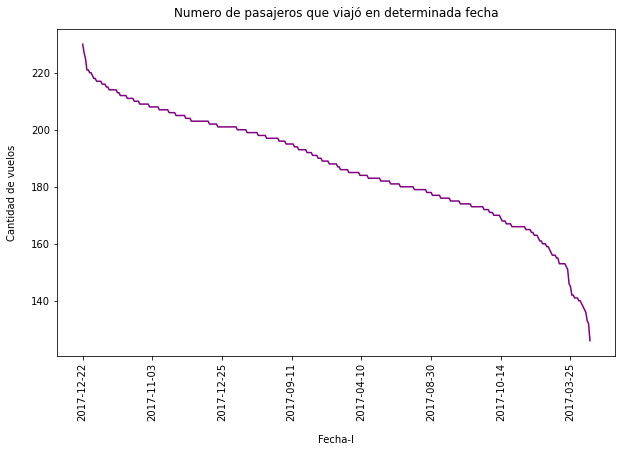

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Fecha-I-split'].value_counts().plot(kind='line', figsize=(10,6), rot=90, color = 'purple')
plt.xlabel("Fecha-I", labelpad=14)
plt.ylabel("Cantidad de vuelos", labelpad=14)
plt.title("Numero de pasajeros que viajó en determinada fecha", y=1.02);

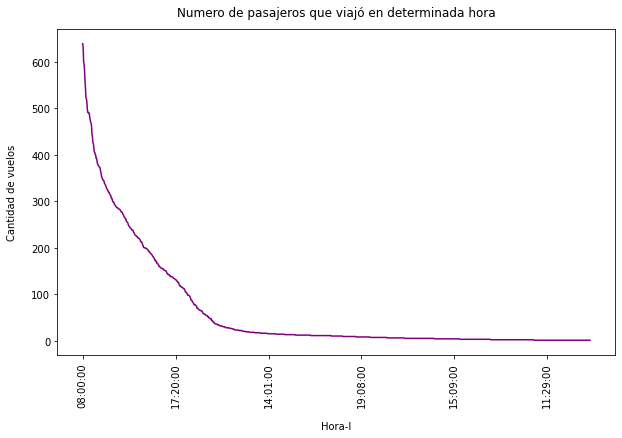

In [28]:
data['Hora-I-split'].value_counts().plot(kind='line', figsize=(10,6), rot=90, color = 'purple')
plt.xlabel("Hora-I", labelpad=14)
plt.ylabel("Cantidad de vuelos", labelpad=14)
plt.title("Numero de pasajeros que viajó en determinada hora", y=1.02);

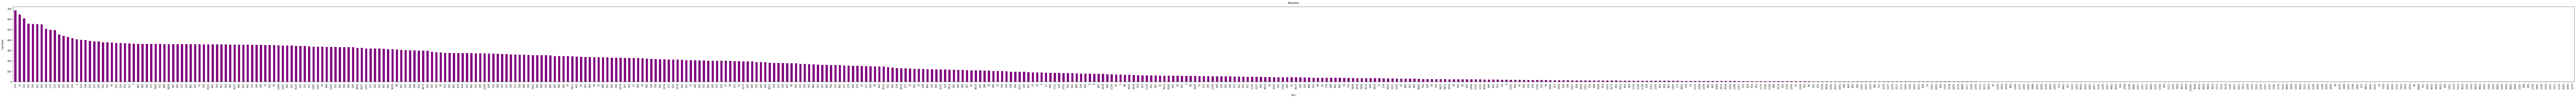

In [29]:
data['Vlo-I'].value_counts().plot(kind='bar', figsize=(200,6), rot=90, color = 'purple')
plt.xlabel("Vlo-I", labelpad=14)
plt.ylabel("Cantidad ", labelpad=14)
plt.title("Numero ", y=1.02);

<AxesSubplot:ylabel='Ori-I'>

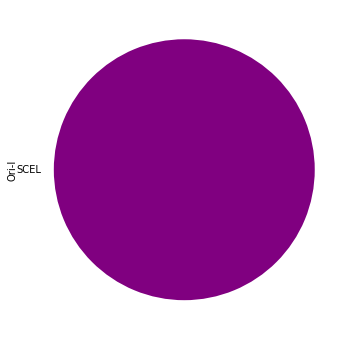

In [62]:
data['Ori-I'].value_counts().plot(kind='pie', figsize=(7,6), rot=90, colors=['purple', 'g', 'b', 'c'])

<AxesSubplot:ylabel='Des-I'>

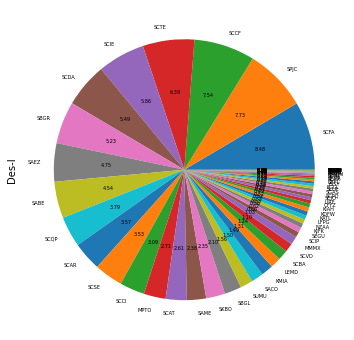

In [73]:
data['Des-I'].value_counts().plot(kind='pie', figsize=(7,6),rot=90, autopct='%.2f', fontsize=5,  pctdistance=0.6)
#plt.xlabel("Ori-I", labelpad=14)
#plt.ylabel("Cantidad ", labelpad=14)
#plt.title("Numero ", y=1.02);

<AxesSubplot:ylabel='Emp-I'>

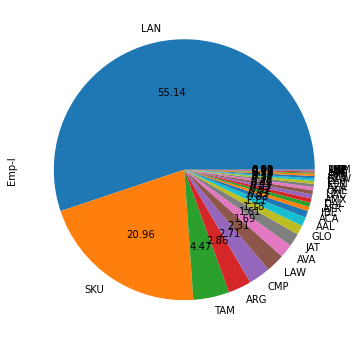

In [74]:
data['Emp-I'].value_counts().plot(kind='pie', figsize=(20,6), rot=90, autopct='%.2f', fontsize=10,  pctdistance=0.6)


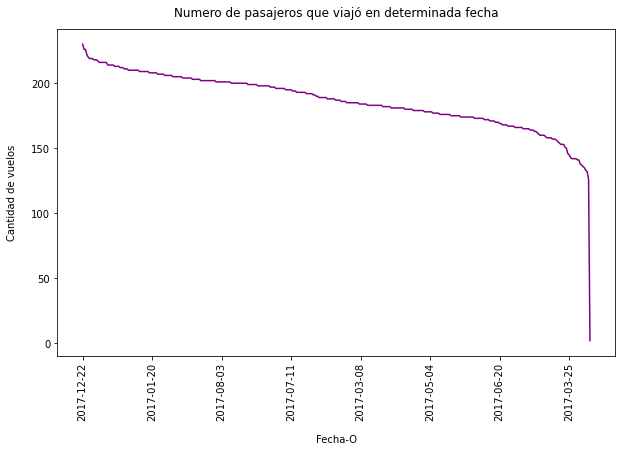

In [78]:
data['Fecha-O-split'].value_counts().plot(kind='line', figsize=(10,6), rot=90, color = 'purple')
plt.xlabel("Fecha-O", labelpad=14)
plt.ylabel("Cantidad de vuelos", labelpad=14)
plt.title("Numero de pasajeros que viajó en determinada fecha", y=1.02);

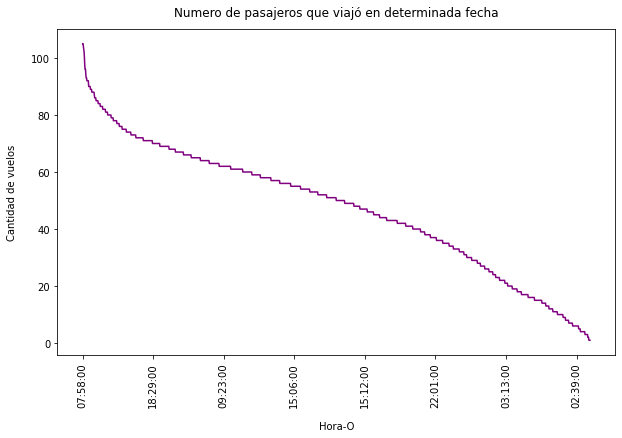

In [79]:
data['Hora-O-split'].value_counts().plot(kind='line', figsize=(10,6), rot=90, color = 'purple')
plt.xlabel("Hora-O", labelpad=14)
plt.ylabel("Cantidad de vuelos", labelpad=14)
plt.title("Numero de pasajeros que viajó en determinada fecha", y=1.02);

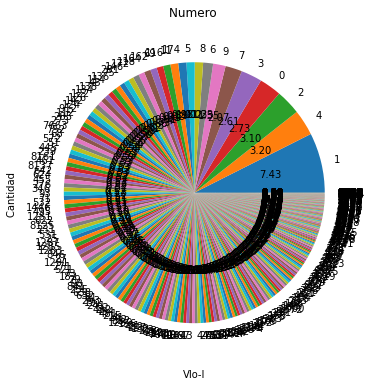

In [83]:
data['Vlo-O'].value_counts().plot(kind='pie', figsize=(10,6), rot=90, autopct='%.2f')
plt.xlabel("Vlo-I",  labelpad=14)
plt.ylabel("Cantidad ", labelpad=14)
plt.title("Numero ", y=1.02);

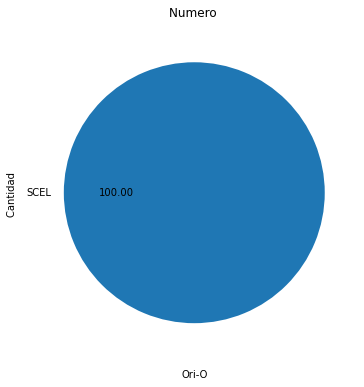

In [84]:
data['Ori-O'].value_counts().plot(kind='pie', figsize=(7,6), rot=90, autopct='%.2f')
plt.xlabel("Ori-O",  labelpad=14)
plt.ylabel("Cantidad ", labelpad=14)
plt.title("Numero ", y=1.02);

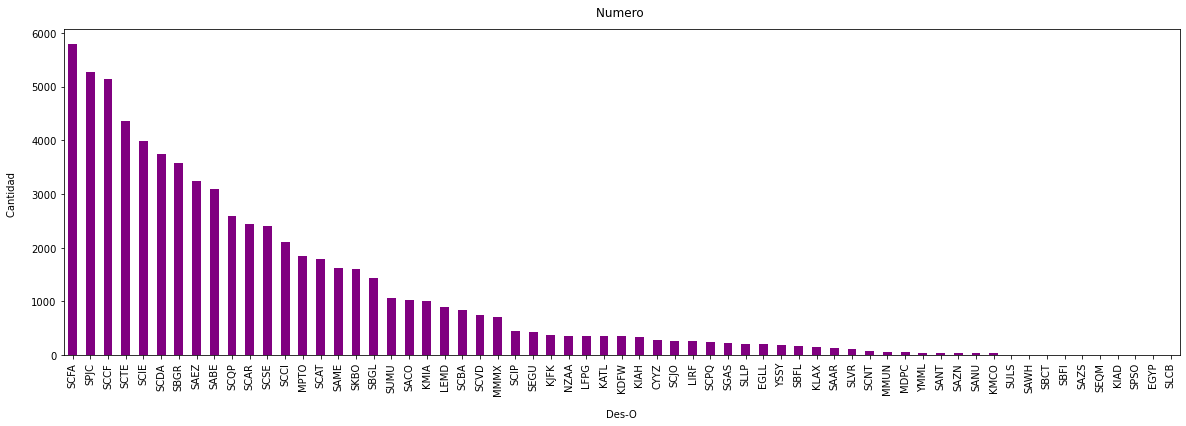

In [58]:
data['Des-O'].value_counts().plot(kind='bar', figsize=(20,6), rot=90, color = 'purple')
plt.xlabel("Des-O",  labelpad=14)
plt.ylabel("Cantidad ", labelpad=14)
plt.title("Numero ", y=1.02);

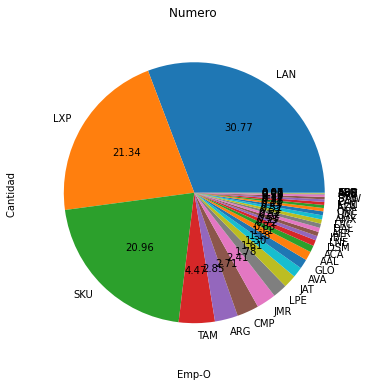

In [86]:
data['Emp-O'].value_counts().plot(kind='pie', figsize=(7,6), rot=90, autopct='%.2f')
plt.xlabel("Emp-O",  labelpad=14)
plt.ylabel("Cantidad ", labelpad=14)
plt.title("Numero ", y=1.02);

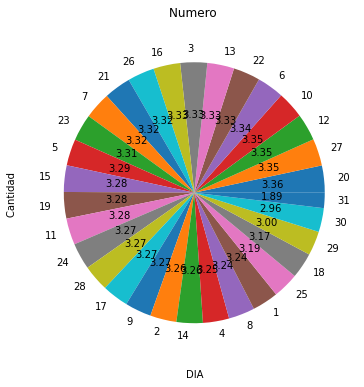

In [92]:
data['DIA'].value_counts().plot(kind='pie', figsize=(7,6), rot=90, autopct='%.2f')
plt.xlabel("DIA",  labelpad=14)
plt.ylabel("Cantidad ", labelpad=14)
plt.title("Numero ", y=1.02);

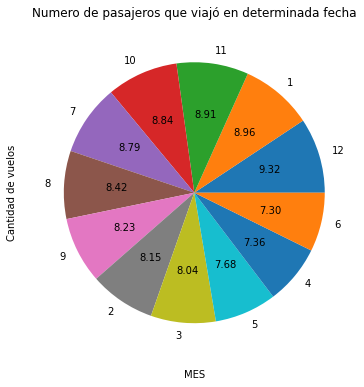

In [91]:
data['MES'].value_counts().plot(kind='pie', figsize=(7,6), rot=90, autopct='%.2f')
plt.xlabel("MES", labelpad=14)
plt.ylabel("Cantidad de vuelos", labelpad=14)
plt.title("Numero de pasajeros que viajó en determinada fecha", y=1.02);

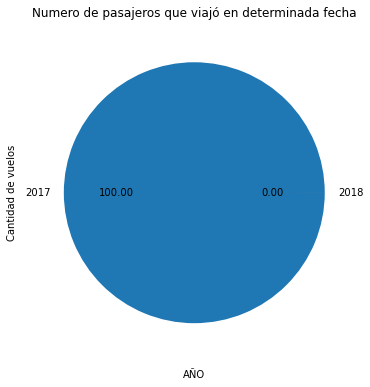

In [90]:
data['AÑO'].value_counts().plot(kind='pie', figsize=(100,6), rot=90, autopct='%.2f')
plt.xlabel("AÑO", labelpad=14)
plt.ylabel("Cantidad de vuelos", labelpad=14)
plt.title("Numero de pasajeros que viajó en determinada fecha", y=1.02);

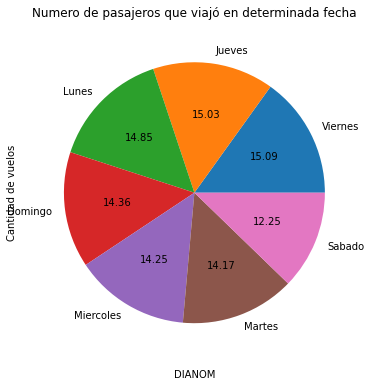

In [87]:
data['DIANOM'].value_counts().plot(kind='pie', figsize=(7,6), rot=90, autopct='%.2f')
plt.xlabel("DIANOM", labelpad=14)
plt.ylabel("Cantidad de vuelos", labelpad=14)
plt.title("Numero de pasajeros que viajó en determinada fecha", y=1.02);

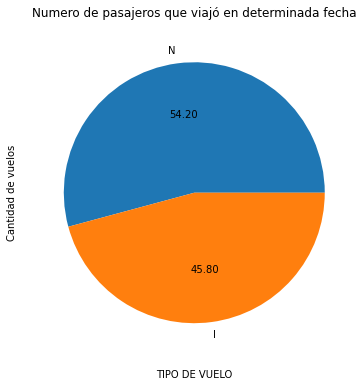

In [88]:
data['TIPOVUELO'].value_counts().plot(kind='pie', figsize=(7,6), rot=90, autopct='%.2f')
plt.xlabel("TIPO DE VUELO", labelpad=14)
plt.ylabel("Cantidad de vuelos", labelpad=14)
plt.title("Numero de pasajeros que viajó en determinada fecha", y=1.02);

AttributeError: 'Figure' object has no attribute 'update_traces'

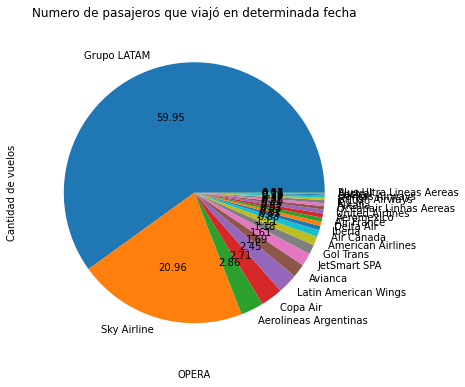

In [96]:
fig = plt.figure()
data['OPERA'].value_counts().plot(kind='pie', figsize=(7,6), rot=90, autopct='%.2f')
plt.xlabel("OPERA", labelpad=14)
plt.ylabel("Cantidad de vuelos", labelpad=14)
plt.title("Numero de pasajeros que viajó en determinada fecha", y=1.02);
fig.update_traces(textinfo='none')

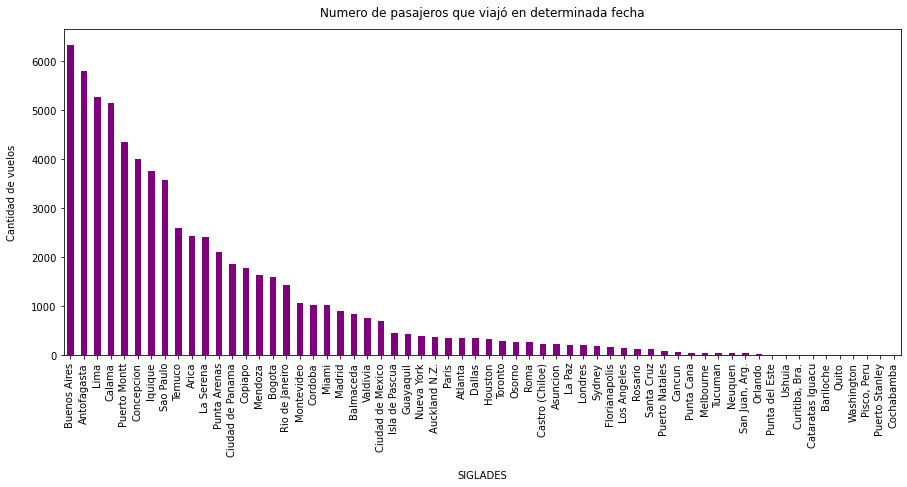

In [76]:
data['SIGLADES'].value_counts().plot(kind='bar', figsize=(15,6), rot=90, color = 'purple')
plt.xlabel("SIGLADES", labelpad=14)
plt.ylabel("Cantidad de vuelos", labelpad=14)
plt.title("Numero de pasajeros que viajó en determinada fecha", y=1.02);

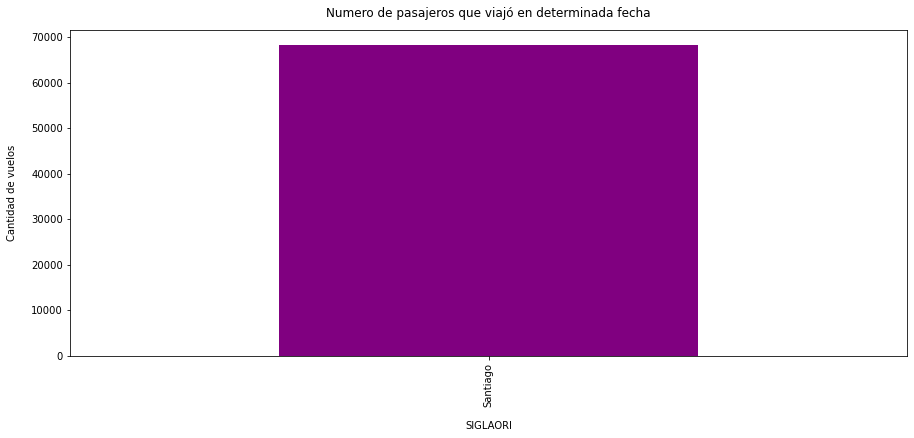

In [77]:
data['SIGLAORI'].value_counts().plot(kind='bar', figsize=(15,6), rot=90, color = 'purple')
plt.xlabel("SIGLAORI", labelpad=14)
plt.ylabel("Cantidad de vuelos", labelpad=14)
plt.title("Numero de pasajeros que viajó en determinada fecha", y=1.02);